# GTEx Tissue

Author: Moshe Silverstein <br/>
Date: 12-17 <br/>
Data Source: https://www.gtexportal.org/home/

In [1]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [3]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/GTEx_Python_Script/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Tue Dec 05 17:15:31 2017 EST

# Load Data

In [5]:
file = 'Input/GTEx_Analysis_v6p_RNA-seq_RNA-SeQCv1.1.8_gene_rpkm.gct'
matrix = pd.read_csv(file, sep='\t' ,skiprows=2)

In [6]:
matrix.head()

,Name,Description,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972.4,DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
1,ENSG00000227232.4,WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
2,ENSG00000243485.2,MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000237613.2,FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000268020.2,OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
matrix.shape

(56238, 8557)

# Load Sample Metadata

In [8]:
sample_meta = pd.read_csv('Input/GTEx_Data_V6_Annotations_SampleAttributesDS.txt', sep='\t', index_col=0)

In [9]:
sample_meta.head()

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMTSTPTREF,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,NaN,NaN,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,NaN,NaN,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0226-SM-5GZZ7,0.0,B1,"2 pieces, ~15% vessel stroma, rep delineated",6.8,Adipose Tissue,Adipose - Subcutaneous,2190,1214.0,1125.0,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0426-SM-5EGHI,0.0,B1,"2 pieces, !5% fibrous connective tissue, delin...",7.1,Muscle,Muscle - Skeletal,11907,1220.0,1119.0,Actual Death,...,12207544.0,10849322.0,0.002745,12393839.0,50.378628,0.008671,0.94627,837.0,0.276804,50.254814
GTEX-1117F-0526-SM-5EGHJ,0.0,B1,"2 pieces, clean, Monckebeg medial sclerosis, r...",8.0,Blood Vessel,Artery - Tibial,7610,1221.0,1120.0,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sample_meta.shape

(11983, 63)

# Load Subject Metadata

In [11]:
subject_meta = pd.read_csv('Input/GTEx_Data_V6_Annotations_SubjectPhenotypesDS.txt', sep='\t', index_col=0)

change gender from 1,2 to M,F

In [12]:
def geneder(s):
    if s == 1:
        return('M')
    elif s== 2:
        return('F')

In [13]:
subject_meta['GENDER'] = subject_meta['GENDER'].map(geneder)

In [14]:
subject_meta.head()

,GENDER,AGE,DTHHRDY
SUBJID,,,
GTEX-N7MS,M,60-69,2.0
GTEX-NFK9,M,40-49,0.0
GTEX-NL3G,F,60-69,2.0
GTEX-NL4W,M,50-59,4.0
GTEX-NPJ7,F,60-69,4.0


In [15]:
subject_meta.shape

(570, 3)

# Set Matrix to Show Gene Symbols

In [16]:
matrix.rename(columns={"Description": "Gene Symbol"}, inplace=True)

In [17]:
matrix.set_index('Gene Symbol', inplace=True)

In [18]:
matrix.drop('Name', axis=1, inplace=True)

In [19]:
matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,0.000000,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Map Sample Metadata to Sample ID

In [20]:
lst = []

for i,col in enumerate(matrix.columns):
    
    progressPercent = ((i+1)/len(matrix.columns))*100

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.columns)))
    sys.stdout.flush()
    
    donor = 'Donor:'+('-').join(col.split('-')[0:2])
    gender = 'Gender:'+subject_meta.loc[donor.split(':')[1], 'GENDER']
    age = 'Age:'+subject_meta.loc[donor.split(':')[1], 'AGE']
    tissue = 'Tissue:'+sample_meta.loc[col, 'SMTSD']
    lst.append(tuple((donor, gender, age, tissue)))
    
matrix.columns = lst

In [21]:
matrix.head()

,"(Donor:GTEX-111CU, Gender:M, Age:50-59, Tissue:Adipose - Subcutaneous)","(Donor:GTEX-111FC, Gender:M, Age:60-69, Tissue:Adipose - Subcutaneous)","(Donor:GTEX-111VG, Gender:M, Age:60-69, Tissue:Adipose - Subcutaneous)","(Donor:GTEX-111YS, Gender:M, Age:60-69, Tissue:Adipose - Subcutaneous)","(Donor:GTEX-1122O, Gender:F, Age:60-69, Tissue:Adipose - Subcutaneous)","(Donor:GTEX-1128S, Gender:F, Age:60-69, Tissue:Adipose - Subcutaneous)","(Donor:GTEX-113IC, Gender:M, Age:60-69, Tissue:Adipose - Subcutaneous)","(Donor:GTEX-117YX, Gender:M, Age:50-59, Tissue:Adipose - Subcutaneous)","(Donor:GTEX-11DXW, Gender:M, Age:40-49, Tissue:Adipose - Subcutaneous)","(Donor:GTEX-11DXX, Gender:F, Age:60-69, Tissue:Adipose - Subcutaneous)",...,"(Donor:GTEX-ZVE2, Gender:M, Age:50-59, Tissue:Whole Blood)","(Donor:GTEX-ZVP2, Gender:M, Age:50-59, Tissue:Whole Blood)","(Donor:GTEX-ZVT2, Gender:F, Age:50-59, Tissue:Whole Blood)","(Donor:GTEX-ZVT3, Gender:F, Age:60-69, Tissue:Whole Blood)","(Donor:GTEX-ZVT4, Gender:F, Age:50-59, Tissue:Whole Blood)","(Donor:GTEX-ZVTK, Gender:M, Age:20-29, Tissue:Whole Blood)","(Donor:GTEX-ZVZP, Gender:M, Age:50-59, Tissue:Whole Blood)","(Donor:GTEX-ZVZQ, Gender:F, Age:60-69, Tissue:Whole Blood)","(Donor:GTEX-ZXES, Gender:F, Age:30-39, Tissue:Whole Blood)","(Donor:GTEX-ZXG5, Gender:M, Age:60-69, Tissue:Whole Blood)"
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,0.000000,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Change Columns To Show Only Tissue Information

In [22]:
lst = []

for col in matrix.columns:
    lst.append(col[3].split(':')[1])

matrix.columns = lst

In [23]:
matrix.head()

,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,...,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,0.000000,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Histogram of First Tissue

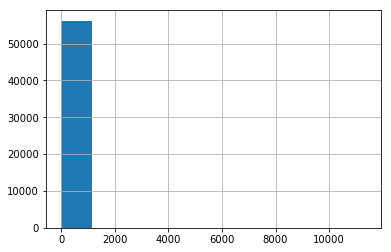

In [24]:
matrix.iloc[:, 0].hist()

# Histogram of First Gene

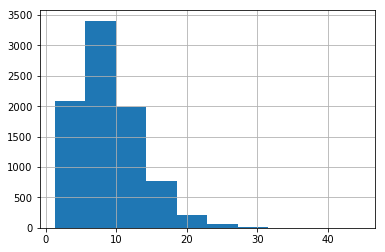

In [25]:
matrix.iloc[1, :].hist()

# Save Unfiltered Sample Matrix To File

In [26]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Drop Any Genes That Have Zero Expression Across 95% Of The Samples

In [27]:
matrix.replace(0, np.nan, inplace=True)

In [28]:
matrix.shape

(56238, 8555)

In [29]:
matrix.dropna(thresh=(0.05*matrix.shape[1]), axis=0, inplace=True)

In [30]:
matrix.shape

(40804, 8555)

In [31]:
matrix.replace(np.nan, 0, inplace=True)

# Log2 Transform

In [32]:
normalized_tissue_matrix = mf.log2(matrix)

# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [33]:
tissues = normalized_tissue_matrix.columns

In [34]:
numbers = np.arange(0,normalized_tissue_matrix.shape[1])

In [35]:
normalized_tissue_matrix.columns = numbers

In [36]:
normalized_tissue_matrix = mf.quantileNormalize(normalized_tissue_matrix)

In [37]:
normalized_tissue_matrix.columns = tissues

In [38]:
normalized_tissue_matrix.head()

,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,...,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030796,0.000000,0.000000,0.000000,...,0.199092,0.273814,0.000000,0.131625,1.025023,0.805958,0.297087,0.955887,0.437453,0.185580
WASH7P,2.660543,3.286740,2.686069,2.792056,2.802808,2.895396,2.893072,2.824134,2.812445,2.357500,...,3.432299,3.560061,3.400576,3.657121,3.834436,3.495198,3.791052,4.343600,3.633577,3.651480
MIR1302-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP11-34P13.7,0.340094,0.378931,0.295718,0.330243,0.350391,0.437241,0.248444,0.427949,0.419957,0.414026,...,0.510714,1.268980,1.938904,0.447697,1.049735,0.429186,2.117718,0.388115,0.926672,0.889723
CICP27,0.000000,0.007638,0.023597,0.033437,0.000000,0.000000,0.000000,0.000000,0.029387,0.061979,...,0.217314,0.753316,1.327605,0.129411,0.633067,0.309861,2.275851,0.133973,1.036483,0.736633


# Nomalize Matrix (z-score the rows)

In [39]:
genes = normalized_tissue_matrix.index

In [40]:
normalized_tissue_matrix.reset_index(inplace=True)

In [41]:
normalized_tissue_matrix.drop('Gene Symbol', axis=1, inplace=True)

In [42]:
mf.zscore(normalized_tissue_matrix, 'row')

In [43]:
normalized_tissue_matrix.index = genes

In [44]:
normalized_tissue_matrix.head()

,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,Adipose - Subcutaneous,...,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood,Whole Blood
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,-0.271077,-0.271077,-0.271077,-0.271077,-0.271077,-0.271077,-0.019466,-0.271077,-0.271077,-0.271077,...,1.355550,1.966040,-0.271077,0.804330,8.103585,6.313776,2.156188,7.538732,3.303006,1.245154
WASH7P,-1.055330,0.190213,-1.004556,-0.793743,-0.772355,-0.588193,-0.592816,-0.729937,-0.753187,-1.658099,...,0.479737,0.733865,0.416639,0.926922,1.279612,0.604849,1.193318,2.292368,0.880092,0.915702
MIR1302-11,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,...,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578,-0.265578
RP11-34P13.7,0.153398,0.313069,-0.029042,0.112901,0.195733,0.552790,-0.223393,0.514593,0.481732,0.457350,...,0.854857,3.972254,6.726455,0.595777,3.070891,0.519675,7.461598,0.350826,2.564949,2.413045
CICP27,-0.255036,-0.219271,-0.144545,-0.098467,-0.255036,-0.255036,-0.255036,-0.255036,-0.117434,0.035176,...,0.762527,3.272325,5.961397,0.350924,2.709264,1.195870,10.401507,0.372284,4.598234,3.194207


# Merge Like Column (by taking the mean)

In [45]:
normalized_tissue_matrix = mf.merge(normalized_tissue_matrix, 'column', 'mean')

In [46]:
normalized_tissue_matrix.shape

(40804, 53)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [47]:
mf.mapgenesymbols(normalized_tissue_matrix)

In [48]:
normalized_tissue_matrix.shape

(25822, 53)

# Merge Duplicate Genes By Rows

In [49]:
normalized_tissue_matrix = mf.merge(normalized_tissue_matrix, 'row', 'mean')

In [50]:
normalized_tissue_matrix.shape

(25562, 53)

# Histogram of First Tissue

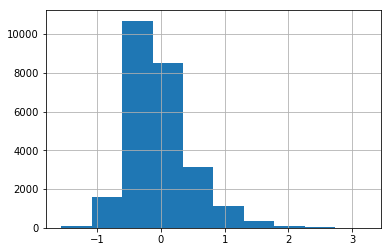

In [51]:
normalized_tissue_matrix.iloc[:, 0].hist()

# Histogram of First Gene

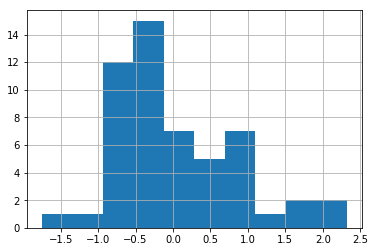

In [52]:
normalized_tissue_matrix.iloc[1, :].hist()

# HeatMap (clustergrammer) of Data

In [53]:
net.load_df(normalized_tissue_matrix)
net.filter_N_top('row', rank_type='sum', N_top=50)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Filtered Tissue Matrix To File

In [54]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_tissue_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [55]:
tertiary_tissue_matrix = mf.createTertiaryMarix(normalized_tissue_matrix)

In [56]:
tertiary_tissue_matrix.head()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
A2M-AS1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Save Teriary Matrix

In [57]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_tissue_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [58]:
standard_matrix = mf.createStandardizedMatix(normalized_tissue_matrix)

In [59]:
standard_matrix.head()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.560096,-0.209301,-0.792331,-0.364560,0.665307,0.447073,-0.965688,0.340778,0.074880,0.264221,...,-0.642909,-0.736582,-0.626195,0.310494,-0.931372,-0.759366,-0.537772,0.384074,0.191742,0.285568
A1BG-AS1,-0.798071,-0.399250,-0.793976,-0.218957,0.910954,0.681736,-0.980623,-0.568903,0.213146,-0.401808,...,-0.738425,-0.865181,-0.168241,0.732188,-0.954751,-0.894542,-0.082190,0.802275,0.260595,0.620436
A1CF,-0.516500,-0.513909,-0.427170,-0.482978,-0.554343,-0.416720,-0.492661,-0.354579,-0.331486,-0.347324,...,-0.419006,-0.417255,0.965090,-0.384120,0.006993,-0.223925,-0.475642,-0.492527,-0.531282,-0.041622
A2M,0.807732,0.819632,-0.004303,0.904767,0.930350,0.862069,0.908556,-0.568485,-0.662129,-0.417675,...,-0.803439,-0.604540,0.296136,0.311632,0.343101,-0.639628,0.591857,0.700280,0.154265,-0.971745
A2M-AS1,0.662689,0.374695,0.716643,0.866739,0.878554,0.799218,0.621161,-0.645720,-0.675200,-0.676925,...,-0.973448,-0.952001,-0.838540,0.222058,-0.751767,-0.674433,-0.785623,0.956040,0.143589,-0.764460


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

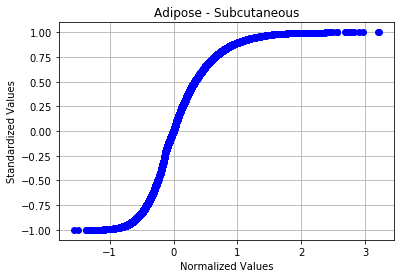

In [60]:
plt.plot(normalized_tissue_matrix[normalized_tissue_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [61]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

## Path to output files

In [62]:
path = '/Users/moshesilverstein/Documents/Harmonizome/GTEx_Python_Script/Output/'

# Create Up Gene Set Library

In [63]:
name = 'gtex_tissue_gene_up_set'

In [64]:
mf.createUpGeneSetLib(tertiary_tissue_matrix, path, name)

# Create Down Gene Set Library

In [65]:
name = 'gtex_tissue_gene_down_set'

In [66]:
mf.createDownGeneSetLib(tertiary_tissue_matrix, path, name)

# Create Up Attribute Library

In [67]:
name = 'gtex_tissue_attribute_up_set'

In [68]:
mf.createUpAttributeSetLib(tertiary_tissue_matrix, path, name)

# Create Down Attribute Library

In [69]:
name = 'gtex_tissue_attribute_down_set'

In [70]:
mf.createDownAttributeSetLib(tertiary_tissue_matrix, path, name)

# Create Attribute Similarity matrix

In [71]:
attribute_tissue_similarity_matix = mf.createSimilarityMatrix(normalized_tissue_matrix.T, 'cosine')

In [72]:
attribute_tissue_similarity_matix.head()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
Adipose - Subcutaneous,1.000000,0.761117,-0.039930,0.256465,0.436070,0.341141,0.148954,-0.347111,-0.386824,-0.364305,...,-0.025064,0.019259,-0.020073,0.024316,-0.069539,-0.206268,0.020871,0.225179,0.119594,-0.068329
Adipose - Visceral (Omentum),0.761117,1.000000,0.007097,0.198143,0.404518,0.147375,0.081619,-0.288229,-0.330370,-0.305832,...,-0.073208,-0.080514,0.039426,0.116894,0.006398,-0.196786,0.035848,0.149021,0.121348,-0.005714
Adrenal Gland,-0.039930,0.007097,1.000000,-0.051278,-0.033315,-0.094954,0.005150,-0.055868,-0.049339,-0.044604,...,-0.125555,-0.135044,-0.027978,0.015754,0.077688,-0.032039,0.063655,-0.028546,-0.117504,-0.085698
Artery - Aorta,0.256465,0.198143,-0.051278,1.000000,0.834196,0.759432,0.160051,-0.191172,-0.202567,-0.203762,...,-0.178216,-0.155382,-0.136336,-0.126005,-0.054603,-0.170997,0.023352,0.323761,0.086111,-0.143485
Artery - Coronary,0.436070,0.404518,-0.033315,0.834196,1.000000,0.749872,0.178344,-0.229094,-0.259281,-0.244613,...,-0.226985,-0.203146,-0.098221,-0.040918,-0.046315,-0.213304,0.037820,0.329461,0.091360,-0.158202


# HeatMap (clustergrammer) of Attribute Similarity Matrix

In [73]:
net.load_df(attribute_tissue_similarity_matix)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Attribute Similarity Matrix

In [74]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_tissue_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene Similaruty Matrix

In [75]:
gene_tissue_similarity_matix = mf.createSimilarityMatrix(normalized_tissue_matrix, 'cosine')

In [76]:
gene_tissue_similarity_matix.head()

Gene Symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.662104,0.651476,-0.019676,0.154808,-0.139808,-0.104899,0.114111,-0.019881,-0.289143,...,-0.110320,-0.097663,-0.074882,0.389943,0.081106,0.248694,0.098123,-0.249492,-0.277419,0.150421
A1BG-AS1,0.662104,1.000000,0.214721,-0.206778,0.046043,-0.193301,-0.067148,-0.068592,0.212146,-0.118171,...,0.066504,0.043753,0.144772,0.340625,0.008575,0.231060,-0.000576,0.105043,-0.089517,0.189808
A1CF,0.651476,0.214721,1.000000,0.105188,0.052286,-0.138067,-0.139308,-0.017976,-0.073824,-0.176869,...,-0.040356,0.091059,-0.079930,0.349224,0.346756,0.230033,-0.080898,-0.149055,0.220204,0.037085
A2M,-0.019676,-0.206778,0.105188,1.000000,0.692654,-0.130053,-0.098633,0.330372,-0.213404,0.635427,...,-0.355928,-0.432623,0.155480,0.094359,0.253359,-0.294951,-0.167422,0.393711,0.202092,0.217599
A2M-AS1,0.154808,0.046043,0.052286,0.692654,1.000000,-0.339157,-0.205298,0.432052,0.009660,0.471469,...,-0.331318,-0.589623,0.337209,0.294380,0.221593,-0.304349,0.217699,0.485144,0.172427,0.297504


# HeatMap (clustergrammer) of Gene Similarity Matrix

In [77]:
sampling = gene_tissue_similarity_matix.iloc[0:50,0:50].copy()

In [78]:
net.load_df(sampling)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Gene Similarity Matrix

In [79]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_tissue_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [80]:
gene_tissue_list = mf.createGeneList(normalized_tissue_matrix)

In [81]:
gene_tissue_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1BG-AS1,503538
2,A1CF,29974
3,A2M,2
4,A2M-AS1,144571


In [82]:
gene_tissue_list.shape

(25562, 2)

# Save Gene List

In [83]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_tissue_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Attribute List

In [84]:
attribute_tissue_list = mf.createAttributeList(normalized_tissue_matrix)

In [85]:
attribute_tissue_list.head()

,Attributes
0,Adipose - Subcutaneous
1,Adipose - Visceral (Omentum)
2,Adrenal Gland
3,Artery - Aorta
4,Artery - Coronary


In [86]:
attribute_tissue_list.shape

(53, 1)

# Save Attribute List

In [87]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_tissue_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_tissue_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Gene-Attribute Edge List

In [88]:
path = '/Users/moshesilverstein/Documents/Harmonizome/GTEx_Python_Script/Output/'

In [89]:
name = 'gtex_tissue_gene_attribute_edge_list'

In [90]:
mf.createGeneAttributeEdgeList(standard_matrix, gene_tissue_list, path, name)

Progeres: 100%  53 Out of 53   

 The number of statisticaly relevent gene-attribute associations is: 1354786
